In [99]:
import pandas                as pd
import seaborn               as sns
import matplotlib.pyplot     as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier
from sklearn.dummy           import DummyClassifier
from sklearn.preprocessing   import StandardScaler
from numpy                   import random


In [100]:
resultados_exames = pd.read_csv("./exames.csv")
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


Verificação de valores ausentes

In [101]:
(resultados_exames.isnull().sum() / resultados_exames.shape[0]).sort_values(ascending=False)

exame_33       0.73638
exame_25       0.00000
exame_19       0.00000
exame_20       0.00000
exame_21       0.00000
exame_22       0.00000
exame_23       0.00000
exame_24       0.00000
exame_26       0.00000
exame_17       0.00000
exame_27       0.00000
exame_28       0.00000
exame_29       0.00000
exame_30       0.00000
exame_31       0.00000
exame_32       0.00000
exame_18       0.00000
id             0.00000
diagnostico    0.00000
exame_7        0.00000
exame_1        0.00000
exame_2        0.00000
exame_3        0.00000
exame_4        0.00000
exame_5        0.00000
exame_6        0.00000
exame_8        0.00000
exame_15       0.00000
exame_9        0.00000
exame_10       0.00000
exame_11       0.00000
exame_12       0.00000
exame_13       0.00000
exame_14       0.00000
exame_16       0.00000
dtype: float64

In [102]:
valores_exames_v1 = valores_exames.drop(columns="exame_33")

Abaixo foi realizado a segregação dos dados. Separando em conjuntos de treino e teste. A variável alvo é o diagnostico

In [103]:
SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico']) #removendo as colunas id e diagnostico
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, 
                                                        diagnostico,
                                                        test_size=0.3)

Classificador DummyClassifier. Modelo de classificador simples para servir de comparação com modelos mais complexos

In [104]:
SEED = 123143
random.seed(SEED)

classificador_dummy = DummyClassifier(strategy="most_frequent")
classificador_dummy.fit(treino_x, treino_y)
print("Resultado da classificação dummy %.2f%%" % (classificador_dummy.score(teste_x, teste_y)*100))

Resultado da classificação dummy 66.67%


Classificador Random Forest Classifier

In [105]:
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)*100))

Resultado da classificação 91.81%


Gerando um gráfico de Violino

In [106]:
pd.concat([diagnostico, valores_exames_v1], axis=1)

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400


In [107]:
dados_plot = pd.concat([diagnostico, valores_exames_v1], axis=1) #Juntar as colunas diagnostico e valores do exame
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", #Exibindo variável diagnostico, criando uma coluna exames e os respectivos valores
                     var_name="exames",
                     value_name="valores")
dados_plot

,diagnostico,exames,valores
0,M,exame_1,17.99000
1,M,exame_1,20.57000
2,M,exame_1,19.69000
3,M,exame_1,11.42000
4,M,exame_1,20.29000
...,...,...,...
18203,M,exame_32,0.07115
18204,M,exame_32,0.06637
18205,M,exame_32,0.07820
18206,M,exame_32,0.12400


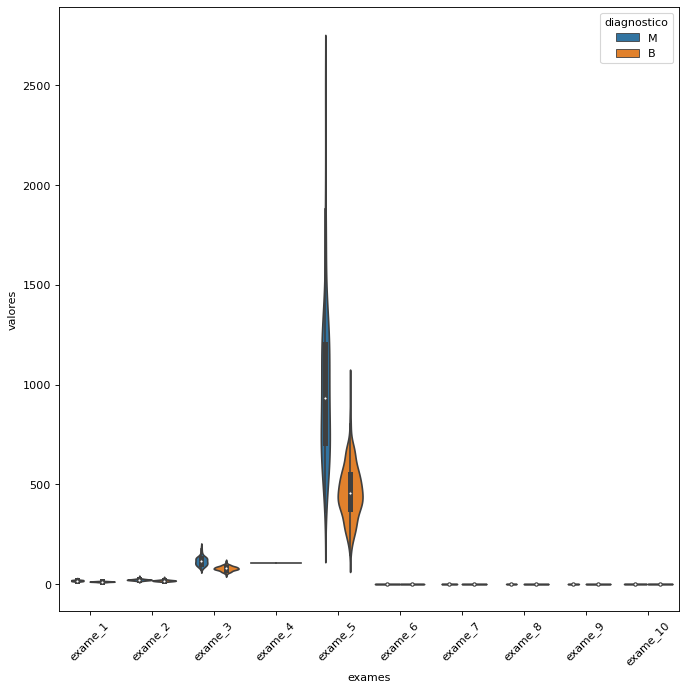

In [108]:
dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis=1) #Juntar as colunas diagnostico e valores do exame
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", #
                     var_name="exames",
                     value_name="valores")

plt.figure(figsize = (10, 10), dpi = 80)
sns.violinplot(x="exames", y="valores", hue="diagnostico", 
               data=dados_plot)
plt.xticks(rotation=45);               

Para evitar que o gráfico seja exibido igual o modelo acima, é necessário realizar a padronização dos dados.
Basicamente, é realizado a instancia do padronizador, em seguida realiza a padronização para posteriormente é realizado o plot.

Analisando o grafico plotado abaixo, a amplitude de cada onda representa a distribuição dos valores. Exemplo - Exame1: a amplitude da onda com diagnóstico Benigno é melhor distribuído do que a amplitude da onda com diagnóstico Maligno.

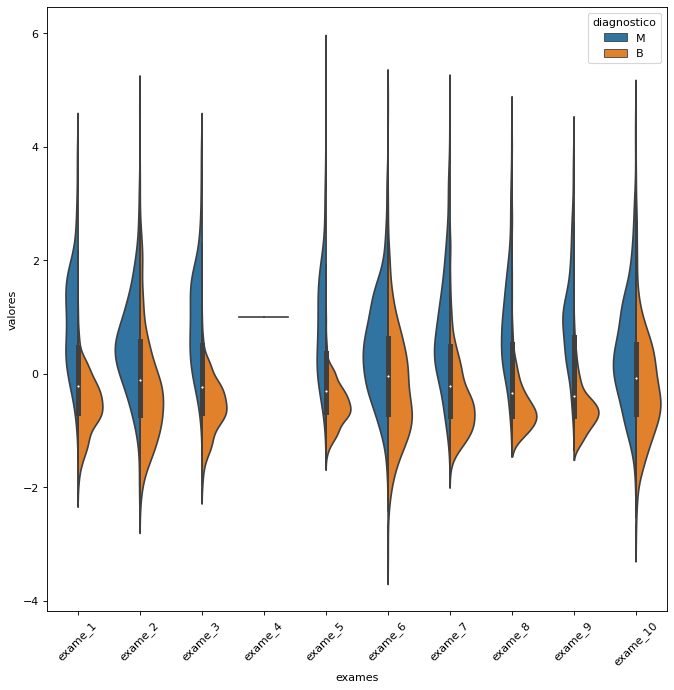

In [109]:
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data=valores_exames_v2,
                                 columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis=1) #Juntar as colunas diagnostico e valores do exame
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", #
                     var_name="exames",
                     value_name="valores")

plt.figure(figsize = (10, 10), dpi = 80)
sns.violinplot(x="exames", y="valores", hue="diagnostico", 
               data=dados_plot, split=True)
plt.xticks(rotation=45);               

Como podemos observar, o **exame_4** tem uma visualização diferente dos demais. Verificando de maneira aprofundada, a variável possui valores constantes atribuídas. 

Quando possuímos valores constantes, podemos realizar a exclusão dessa feature para não atrapalhar o nosso modelo.

In [110]:
valores_exames_v2.exame_4.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: exame_4, dtype: float64

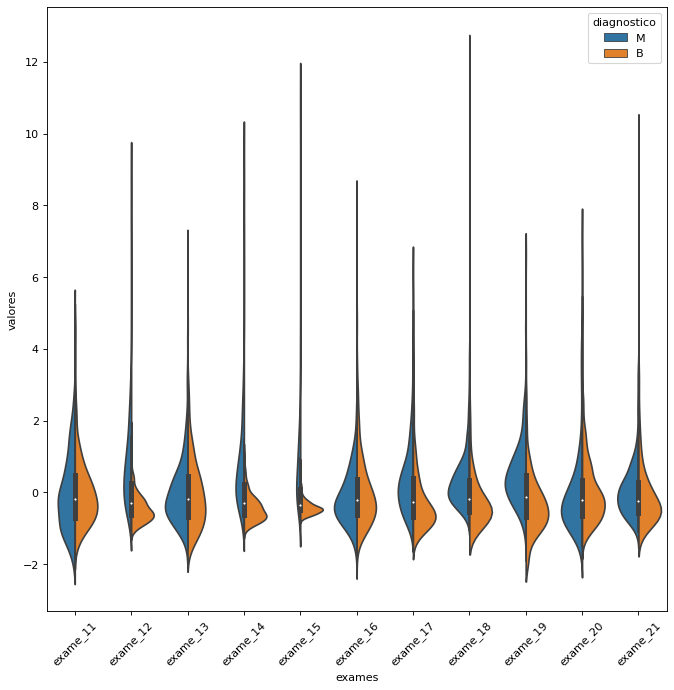

In [111]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis=1) #Juntar as colunas diagnostico e valores do exame
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", #
                        var_name="exames",
                        value_name="valores")

    plt.figure(figsize = (10, 10), dpi = 80)
    sns.violinplot(x="exames", y="valores", hue="diagnostico", 
                data=dados_plot, split=True)
    plt.xticks(rotation=45);
    
grafico_violino(valores_exames_v2, 10, 21)

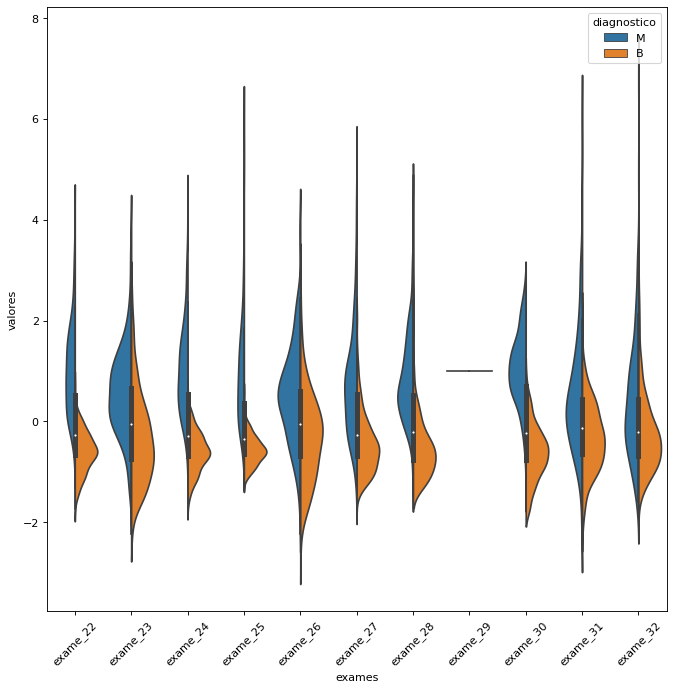

In [112]:
grafico_violino(valores_exames_v2, 21, 32)

Reduzindo duas dimensões dos dados (exame_4 e exame_29) foi possível obter um level ganho no resultado da classificação. O mais importante é que não houve queda no resultado.

In [113]:
valores_exames_v3 = valores_exames_v2.drop(columns=[ "exame_4", "exame_29"])

def classificar(valores):
    SEED=1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores,
                                                            diagnostico,
                                                            test_size=0.3)

    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x, treino_y)
    print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)*100))
classificar(valores_exames_v3)

Resultado da classificação 92.98%


<AxesSubplot:>

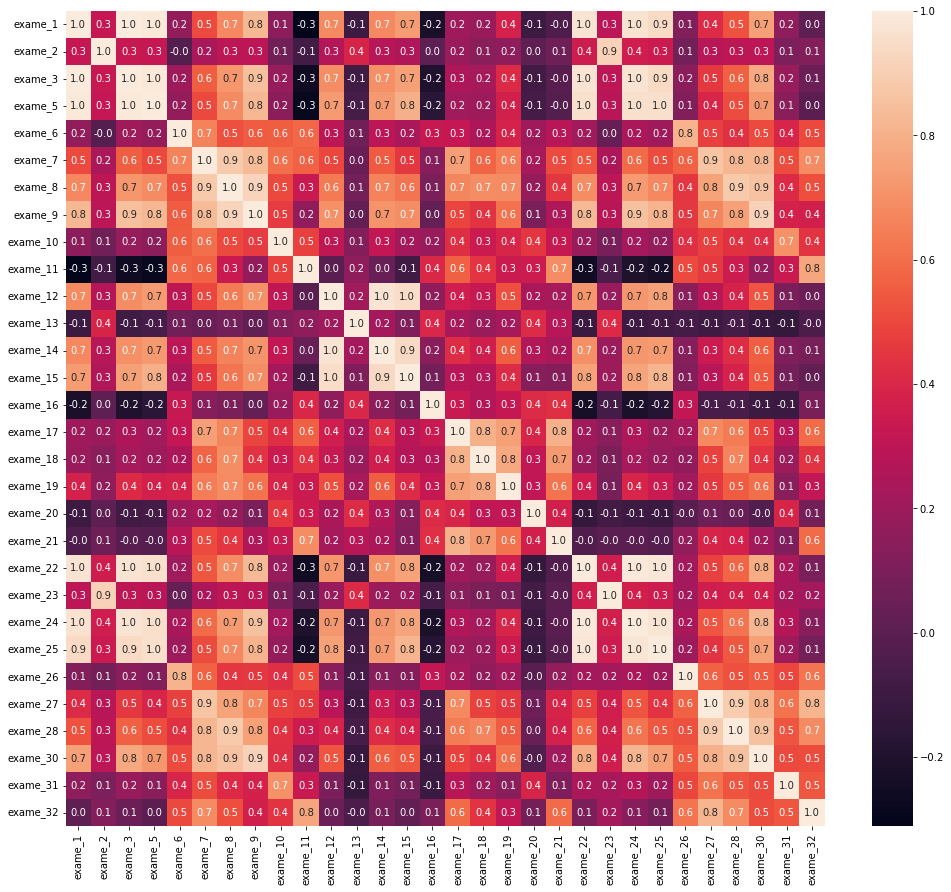

In [114]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize=(17,15))
sns.heatmap(matriz_correlacao, annot=True, fmt=".1f")

In [115]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [118]:
#variáveis altamente correlacionadas
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

Excluindo todas as variáveis altamente correlacionadas diminuiu a nossa acurácia do modelo. Sendo assim, foi excluído apenas 2 variáveis altamente correlacionadas, mantendo a acuracidade boa (92,98%)

In [123]:
#Exclusão de todas as variáveis altamente correlacionadas
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
classificar(valores_exames_v4)

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [124]:
classificar(valores_exames_v4)

Resultado da classificação 91.81%


In [129]:
#Exclusão de 2 variáveis altamente correlacionadas para manter a acuracidade
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])
classificar(valores_exames_v5)

Resultado da classificação 92.98%


Lembrando que correlação e causalidade nem sempre são verdadeiras. Elas podem estar correlacionadas mas uma não implica a causalidade da outra